# 数据描述

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('heart_dealed.csv')
df.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  Re1ingECG  \
0   40    1              2        140          289          0          0   
1   49    0              1        160          180          0          0   
2   37    1              2        130          283          0          1   
3   48    0              0        138          214          0          0   
4   54    1              1        150          195          0          0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         1             0  
1    156               0      1.0         2             1  
2     98               0      0.0         1             0  
3    108               1      1.5         2             1  
4    122               0      0.0         1             0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   Re1ingECG       918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
Re1ingECG         0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# 特征工程

In [5]:
df['HighNum'] = ((df['RestingBP'] >= 130).astype(int) + (df['Cholesterol'] >= 240).astype(int) + (df['FastingBS'] == 1).astype(int)) # 三高数量
df['BP_Chol_Ratio'] = df['RestingBP'] / df['Cholesterol']  # 血压与胆固醇比值
df['HR_Age_Ratio'] = df['MaxHR'] / df['Age']              # 心率年龄比
df['RPP'] = df['MaxHR'] * df['RestingBP'] / 100           # 心肌耗氧量代理指标

df.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  Re1ingECG  \
0   40    1              2        140          289          0          0   
1   49    0              1        160          180          0          0   
2   37    1              2        130          283          0          1   
3   48    0              0        138          214          0          0   
4   54    1              1        150          195          0          0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  HighNum  \
0    172               0      0.0         1             0        2   
1    156               0      1.0         2             1        1   
2     98               0      0.0         1             0        2   
3    108               1      1.5         2             1        1   
4    122               0      0.0         1             0        1   

   BP_Chol_Ratio  HR_Age_Ratio     RPP  
0       0.484429      4.300000  240.80  
1       0.888889      3.183673  249.60  
2       0.459364      2.648649  127.40  
3       0.644860      2.250000  149.04  
4       0.769231      2.259259  183.00

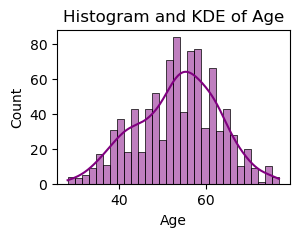

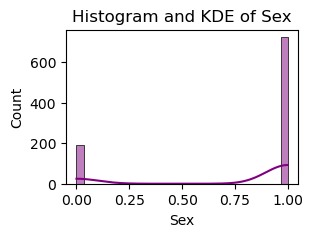

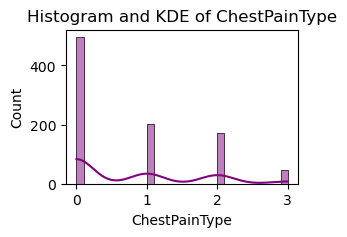

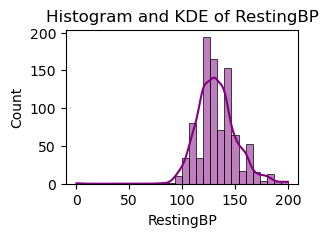

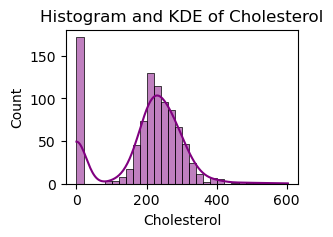

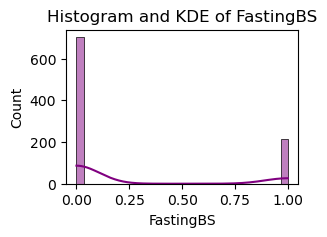

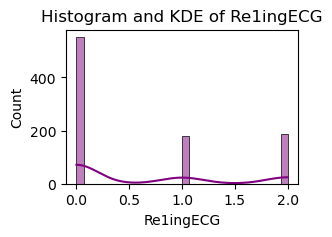

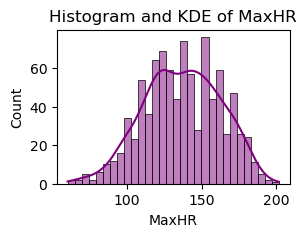

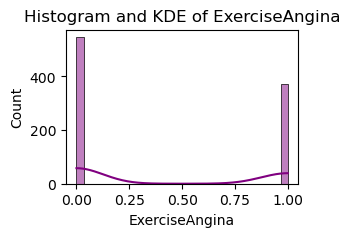

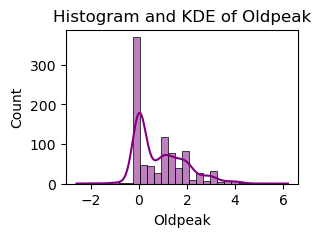

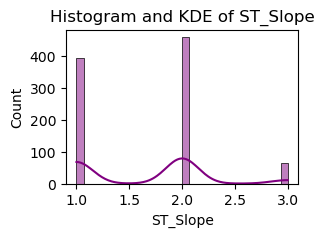

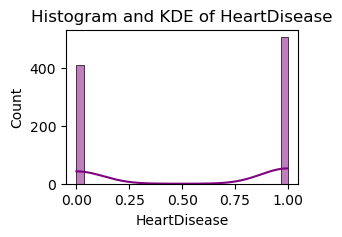

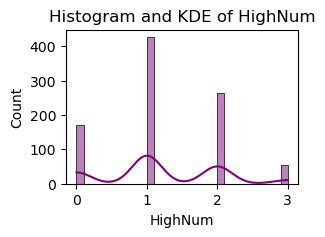

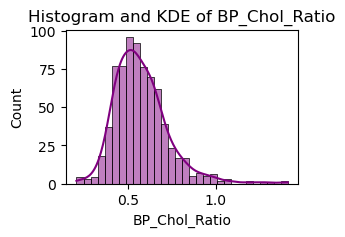

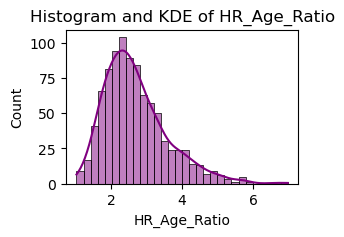

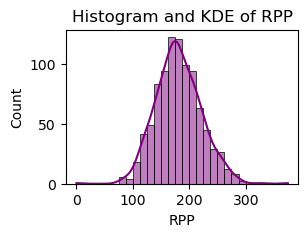

In [6]:
for col in df.columns:
    plt.figure(figsize=(3,2))
    sns.histplot(df[col],kde=True,bins=30,color='purple')
    plt.xlabel(col)
    plt.title(f'Histogram and KDE of {col}')
    plt.show()

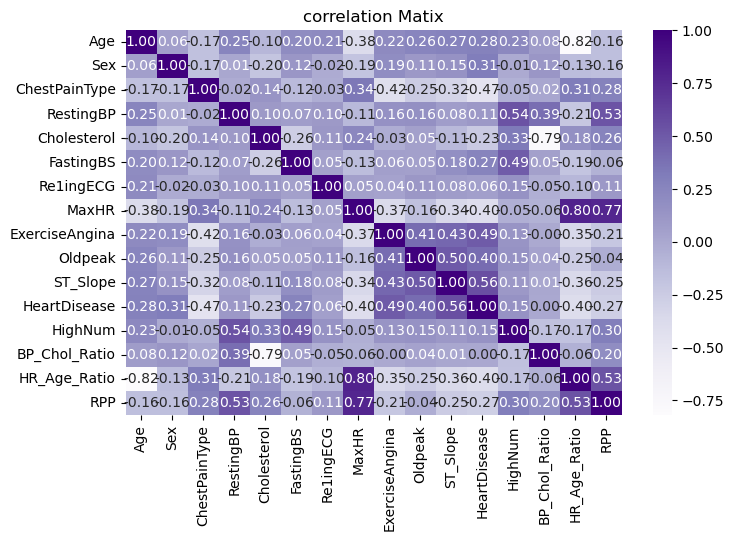

HeartDisease      1.000000
ST_Slope          0.558771
ExerciseAngina    0.494282
ChestPainType     0.471354
Oldpeak           0.403951
MaxHR             0.400421
HR_Age_Ratio      0.398518
Sex               0.305445
Age               0.282039
RPP               0.273060
FastingBS         0.267291
Cholesterol       0.232741
HighNum           0.148238
RestingBP         0.107589
Re1ingECG         0.061011
BP_Chol_Ratio     0.001137
Name: HeartDisease, dtype: float64


In [7]:
plt.figure(figsize=(8,5))
corr_matrix=df.corr(numeric_only=True)
sns.heatmap(corr_matrix,annot=True,cmap='Purples',fmt='.2f')
plt.title("correlation Matix")
plt.show()
heart_corr = corr_matrix['HeartDisease'].sort_values(ascending=False)
heart_corr = abs(heart_corr).sort_values(ascending=False)
print(heart_corr)

# 归一化

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['MaxHR'] = scaler.fit_transform(df[['MaxHR']])
df['Age'] = scaler.fit_transform(df[['Age']])
df['RPP'] = scaler.fit_transform(df[['RPP']])

In [9]:
X = df[heart_corr[:12].index]
Col = X.columns
print(X.columns,X.shape)
X.head()

Index(['HeartDisease', 'ST_Slope', 'ExerciseAngina', 'ChestPainType',
       'Oldpeak', 'MaxHR', 'HR_Age_Ratio', 'Sex', 'Age', 'RPP', 'FastingBS',
       'Cholesterol'],
      dtype='object') (918, 12)


HeartDisease  ST_Slope  ExerciseAngina  ChestPainType  Oldpeak     MaxHR  \
0             0         1               0              2      0.0  0.788732   
1             1         2               0              1      1.0  0.676056   
2             0         1               0              2      0.0  0.267606   
3             1         2               1              0      1.5  0.338028   
4             0         1               0              1      0.0  0.436620   

   HR_Age_Ratio  Sex       Age       RPP  FastingBS  Cholesterol  
0      4.300000    1  0.244898  0.643162          0          289  
1      3.183673    0  0.428571  0.666667          0          180  
2      2.648649    1  0.183673  0.340278          0          283  
3      2.250000    0  0.408163  0.398077          0          214  
4      2.259259    1  0.530612  0.488782          0          195

# 一阶段贝叶斯逻辑回归

In [10]:
import arviz as az
import pymc as pm
from sklearn.metrics import accuracy_score,roc_auc_score, confusion_matrix

In [11]:
X1 = X.loc[X['Cholesterol']==0].drop('Cholesterol',axis = 1)
y1 = X1[['HeartDisease']]
X1 = X1.drop('HeartDisease',axis=1)
X1.head()

ST_Slope  ExerciseAngina  ChestPainType  Oldpeak     MaxHR  HR_Age_Ratio  \
293         2               1              0      0.0  0.232394      1.430769   
294         1               0              3      0.7  0.471831      3.968750   
295         1               1              0      1.5  0.352113      1.803279   
296         2               1              0      0.7  0.556338      2.780000   
297         1               1              0      1.4  0.500000      2.298246   

     Sex       Age       RPP  FastingBS  
293    1  0.755102  0.285657          0  
294    1  0.081633  0.322249          1  
295    1  0.673469  0.308494          1  
296    1  0.448980  0.538328          1  
297    1  0.591837  0.384882          1

In [12]:
X2 = X.loc[X['Cholesterol']!=0]
y2 = X2[['HeartDisease']]
X2 = X2.drop('HeartDisease',axis=1)
X2['Cholesterol'] = scaler.fit_transform(X2[['Cholesterol']])
X2.head()

ST_Slope  ExerciseAngina  ChestPainType  Oldpeak     MaxHR  HR_Age_Ratio  \
0         1               0              2      0.0  0.788732      4.300000   
1         2               0              1      1.0  0.676056      3.183673   
2         1               0              2      0.0  0.267606      2.648649   
3         2               1              0      1.5  0.338028      2.250000   
4         1               0              1      0.0  0.436620      2.259259   

   Sex       Age       RPP  FastingBS  Cholesterol  
0    1  0.244898  0.643162          0     0.393822  
1    0  0.428571  0.666667          0     0.183398  
2    1  0.183673  0.340278          0     0.382239  
3    0  0.408163  0.398077          0     0.249035  
4    1  0.530612  0.488782          0     0.212355

(172, 10) (172,)
Stage 1


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_w, w, b]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 29 seconds.


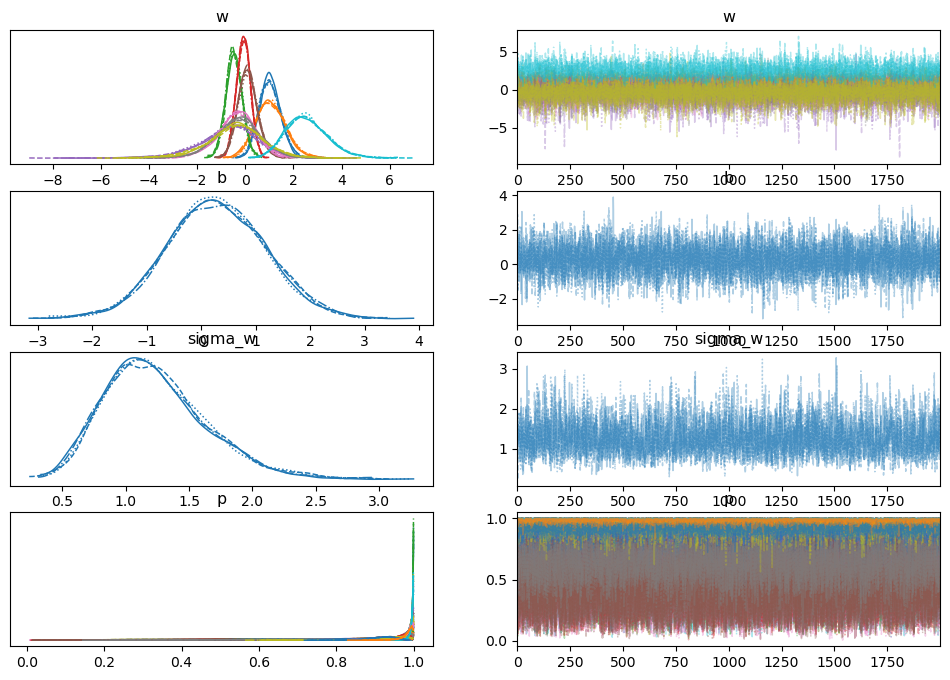

Mean: [ 1.02408887  1.05805099 -0.46884797 -0.07951545 -0.71758518  0.10487248
 -0.38239457 -0.2971931  -0.41859705  2.5668783 ]
Std: [0.44728256 0.62073042 0.33244883 0.29013521 1.23964115 0.41107057
 0.80097643 0.95482218 1.18743085 0.86698872]
TrainSet
Confusion Matrix:
 [[  5  15]
 [  3 149]]
AUC Score: 0.8950657894736842
Accuracy on X1: 0.8953488372093024
TestSet
Confusion Matrix:
 [[148 242]
 [  9 347]]
Accuracy on X2: 0.6635388739946381
AUC Score on X2: 0.8498415442235666
(746, 11) (746,)
Stage 2


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w_shared, w_cholesterol, b]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 46 seconds.


Confusion Matrix:
 [[335  55]
 [ 56 300]]
AUC Score: 0.9185897435897437
Accuracy on X2: 0.8512064343163539
Mean: [ 1.44866284  1.09834843 -0.67867509  0.37884614 -0.25433479 -0.5855366
  1.23335282 -0.68077242  0.09064862  0.61473617  1.1332134 ]
Std: [0.18884308 0.22847293 0.1130123  0.11703983 0.84410186 0.21311022
 0.24562733 0.62189972 0.92037014 0.2781332  0.90515867]


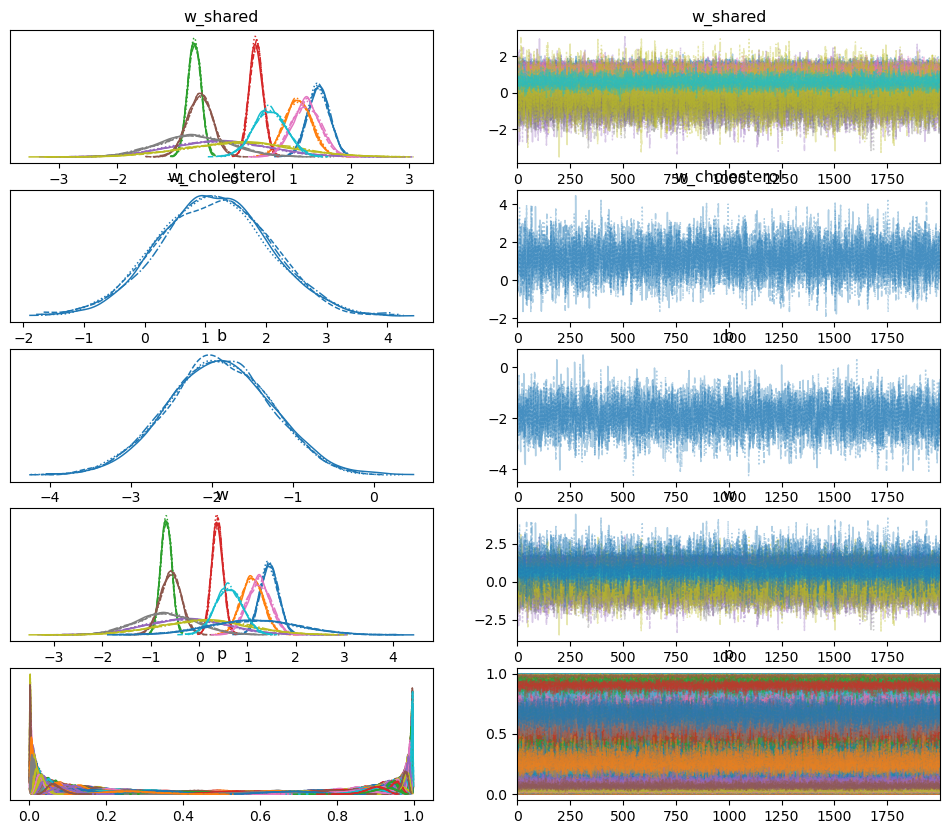

In [13]:
def train1(X1,y1,X2,y2):
    X1 = np.array(X1)
    y1 = np.array(y1).squeeze()
    print(X1.shape,y1.shape)
    # 一阶段
    print('Stage 1')
    with pm.Model() as logistic_model:
        sigma_w = pm.HalfNormal("sigma_w", sigma=1)
        w = pm.Normal("w", mu=0, sigma=sigma_w, shape=10)
        b = pm.Normal("b", mu=0, sigma=1)
        logit_p = pm.math.dot(X1, w) + b
        p = pm.Deterministic("p", 1/(1 + pm.math.exp(-logit_p)))
        y_obs = pm.Bernoulli("y_obs", p = p, observed = y1)
        trace1 = pm.sample(2000, tune = 1000, chains = 4, target_accept=0.9)
        
    az.plot_trace(trace1)
    plt.show()

    w1_mean = trace1.posterior["w"].mean(dim=("chain", "draw")).values
    w1_std = trace1.posterior["w"].std(dim=("chain", "draw")).values
    w1_samples = trace1.posterior["w"].stack(sample=("chain", "draw")).values
    b1_samples = trace1.posterior["b"].stack(sample=("chain", "draw")).values
    print(f'Mean: {w1_mean}\nStd: {w1_std}')
    p_mean = trace1.posterior["p"].mean(dim=("chain", "draw")).values
    y1_pred = (p_mean > 0.5).astype(int)
    
    # 训练集
    print('TrainSet')
    print("Confusion Matrix:\n", confusion_matrix(y1, y1_pred))
    print("AUC Score:", roc_auc_score(y1, p_mean))
    print("Accuracy on X1:", accuracy_score(y1, y1_pred))
    test_X = np.array(X2.drop('Cholesterol',axis = 1))
    test_y = np.array(y2.squeeze())
    
    n_samples = w1_samples.shape[1]
    n_test = test_X.shape[0]
    
    # 初始化预测数组
    logits = np.zeros((n_samples, n_test))
    for i in range(n_samples):
        logits[i] = test_X @ w1_samples[:, i] + b1_samples[i]
    probs = 1/(1+np.exp(-logits))
    prob_mean = probs.mean(axis=0)
    y2_pred = (prob_mean > 0.5).astype(int)
    
    # 测试集
    print('TestSet')
    print("Confusion Matrix:\n", confusion_matrix(test_y, y2_pred))
    print("Accuracy on X2:", accuracy_score(test_y, y2_pred))
    print("AUC Score on X2:", roc_auc_score(test_y, prob_mean))
    w1_posterior = trace1.posterior["w"]
    b1_posterior = trace1.posterior["b"]
    
    w1_mean = w1_posterior.mean(dim=("chain", "draw")).values
    w1_std = w1_posterior.std(dim=("chain", "draw")).values
    
    b1_mean = b1_posterior.mean(dim=("chain", "draw")).values.item()
    b1_std = b1_posterior.std(dim=("chain", "draw")).values.item()
    
    X2 = np.array(X2)
    y2 = np.array(y2).squeeze()
    print(X2.shape,y2.shape)
    # 二阶段
    print('Stage 2')
    with pm.Model() as model2:
        # 对前10个特征使用 informative prior（由第一个模型的后验提供）
        w_shared = pm.Normal("w_shared", mu=w1_mean, sigma=w1_std, shape=10)
        # 对新增特征 Cholesterol 使用非信息先验（可以调整为弱信息如 Normal(0, 5)）
        w_new = pm.Normal("w_cholesterol", mu=0, sigma=5)
        # 合并权重
        w = pm.Deterministic("w", pm.math.concatenate([w_shared, w_new[None]]))  # shape = (11,)
    
        b = pm.Normal("b", mu=b1_mean, sigma=b1_std)
    
        z = pm.math.dot(X2, w) + b
        p = pm.Deterministic("p", pm.math.sigmoid(z))
        y_obs = pm.Bernoulli("y_obs", p=p, observed=y2)
        trace2 = pm.sample(2000, tune=1000, target_accept=0.9, return_inferencedata=True)
        
    az.plot_trace(trace2)

    p2_mean = trace2.posterior["p"].mean(dim=("chain", "draw")).values
    y2_pred = (p2_mean > 0.5).astype(int)
    
    print("Confusion Matrix:\n", confusion_matrix(y2, y2_pred))
    print("AUC Score:", roc_auc_score(y2, p2_mean))
    print("Accuracy on X2:", accuracy_score(y2, y2_pred))

    w2_mean = trace2.posterior["w"].mean(dim=("chain", "draw")).values
    w2_std = trace2.posterior["w"].std(dim=("chain", "draw")).values
    w2_samples = trace2.posterior["w"].stack(sample=("chain", "draw")).values
    b2_samples = trace2.posterior["b"].stack(sample=("chain", "draw")).values
    print(f'Mean: {w2_mean}\nStd: {w2_std}')
train1(X1,y1,X2,y2)

(172, 10) (172,)
Stage 1


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, b]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 44 seconds.


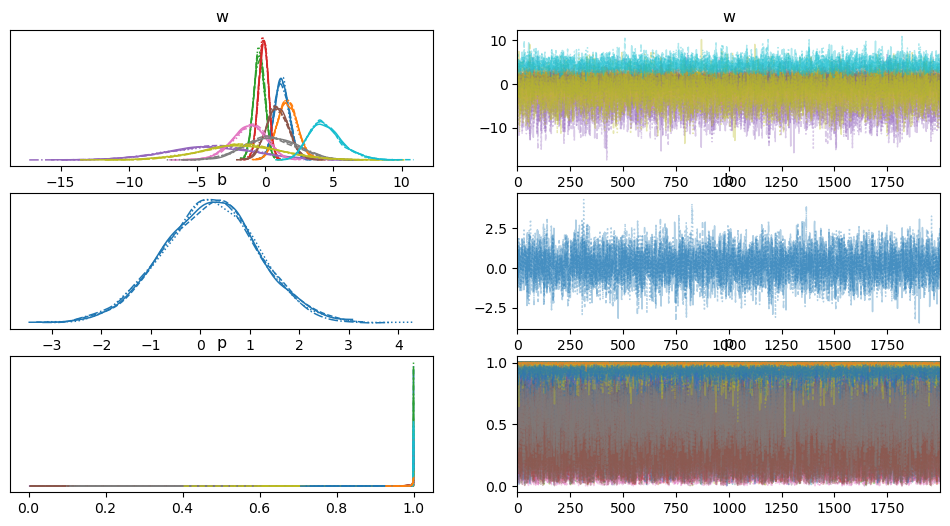

Mean: [ 1.22507129  1.621916   -0.4334178  -0.13055713 -3.99741766  0.90518544
 -1.20302569  0.42041114 -1.78798984  4.45101949]
Std: [0.54952    0.73644531 0.40243884 0.36025743 3.27776417 0.82376722
 1.26436068 1.89691922 2.94272544 1.2417783 ]
TrainSet
Confusion Matrix:
 [[  7  13]
 [  4 148]]
AUC Score: 0.9029605263157894
Accuracy on X1: 0.9011627906976745
TestSet
Confusion Matrix:
 [[171 219]
 [ 29 327]]
Accuracy on X2: 0.6675603217158177
AUC Score on X2: 0.8044655718813022
(746, 11) (746,)
Stage 2


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w_shared, w_cholesterol, b]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 57 seconds.


Confusion Matrix:
 [[335  55]
 [ 54 302]]
AUC Score: 0.919396427542495
Accuracy on X2: 0.853887399463807
Mean: [ 1.53212989  1.14976496 -0.6803675   0.37411915  0.05962343 -0.75758165
  1.34994247 -1.07857413  0.69847588  0.57827131  1.24891776]
Std: [0.20595727 0.23375065 0.1169515  0.12398222 1.36978228 0.3213851
 0.26016752 0.89537845 1.46229955 0.29372746 0.92139332]


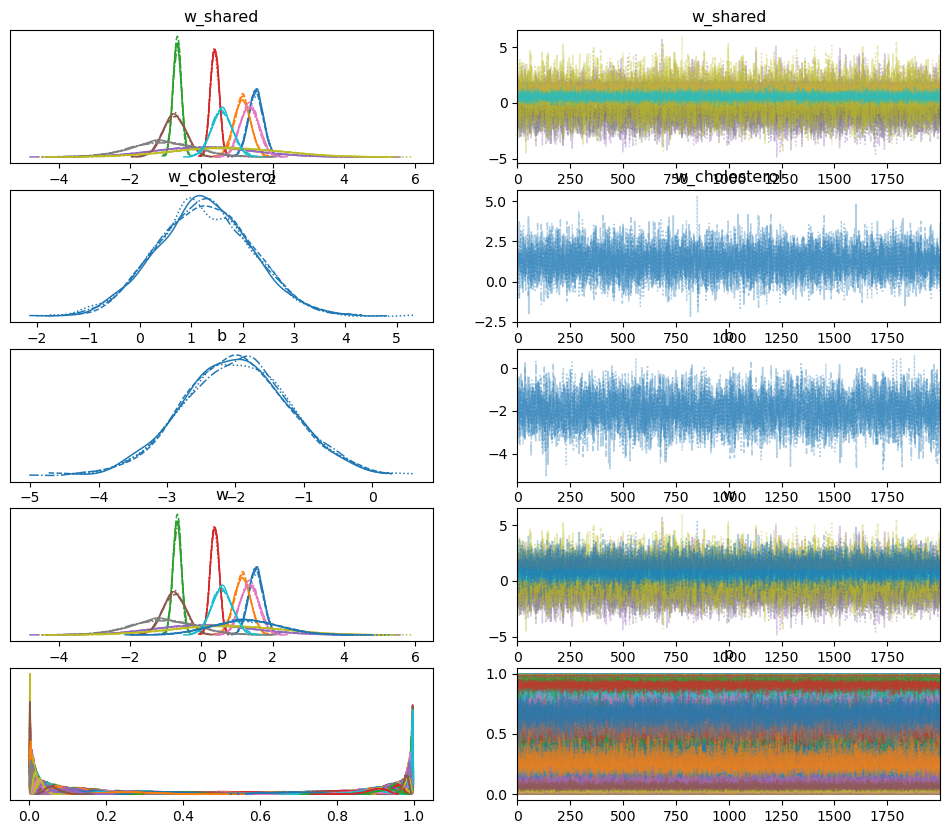

In [14]:
def train2(X1,y1,X2,y2):
    X1 = np.array(X1)
    y1 = np.array(y1).squeeze()
    print(X1.shape,y1.shape)
    # 一阶段
    print('Stage 1')
    with pm.Model() as logistic_model:
        w = pm.Normal("w", mu=0, sigma=5, shape=10)
        b = pm.Normal("b", mu=0, sigma=1)
        logit_p = pm.math.dot(X1, w) + b
        p = pm.Deterministic("p", 1/(1 + pm.math.exp(-logit_p)))
        y_obs = pm.Bernoulli("y_obs", p = p, observed = y1)
        trace1 = pm.sample(2000, tune = 1000, chains = 4, target_accept=0.9)
        
    az.plot_trace(trace1)
    plt.show()

    w1_mean = trace1.posterior["w"].mean(dim=("chain", "draw")).values
    w1_std = trace1.posterior["w"].std(dim=("chain", "draw")).values
    w1_samples = trace1.posterior["w"].stack(sample=("chain", "draw")).values
    b1_samples = trace1.posterior["b"].stack(sample=("chain", "draw")).values
    print(f'Mean: {w1_mean}\nStd: {w1_std}')
    p_mean = trace1.posterior["p"].mean(dim=("chain", "draw")).values
    y1_pred = (p_mean > 0.5).astype(int)
    
    # 训练集
    print('TrainSet')
    print("Confusion Matrix:\n", confusion_matrix(y1, y1_pred))
    print("AUC Score:", roc_auc_score(y1, p_mean))
    print("Accuracy on X1:", accuracy_score(y1, y1_pred))
    test_X = np.array(X2.drop('Cholesterol',axis = 1))
    test_y = np.array(y2).squeeze()
    
    n_samples = w1_samples.shape[1]
    n_test = test_X.shape[0]
    
    # 初始化预测数组
    logits = np.zeros((n_samples, n_test))
    for i in range(n_samples):
        logits[i] = test_X @ w1_samples[:, i] + b1_samples[i]
    probs = 1/(1+np.exp(-logits))
    prob_mean = probs.mean(axis=0)
    y2_pred = (prob_mean > 0.5).astype(int)
    
    # 测试集
    print('TestSet')
    print("Confusion Matrix:\n", confusion_matrix(test_y, y2_pred))
    print("Accuracy on X2:", accuracy_score(test_y, y2_pred))
    print("AUC Score on X2:", roc_auc_score(test_y, prob_mean))
    w1_posterior = trace1.posterior["w"]
    b1_posterior = trace1.posterior["b"]
    
    w1_mean = w1_posterior.mean(dim=("chain", "draw")).values
    w1_std = w1_posterior.std(dim=("chain", "draw")).values
    
    b1_mean = b1_posterior.mean(dim=("chain", "draw")).values.item()
    b1_std = b1_posterior.std(dim=("chain", "draw")).values.item()
    
    X2 = np.array(X2)
    y2 = np.array(y2).squeeze()
    print(X2.shape,y2.shape)
    # 二阶段
    print('Stage 2')
    with pm.Model() as model2:
        # 对前10个特征使用 informative prior（由第一个模型的后验提供）
        w_shared = pm.Normal("w_shared", mu=w1_mean, sigma=w1_std, shape=10)
        # 对新增特征 Cholesterol 使用非信息先验（可以调整为弱信息如 Normal(0, 5)）
        w_new = pm.Normal("w_cholesterol", mu=0, sigma=5)
        # 合并权重
        w = pm.Deterministic("w", pm.math.concatenate([w_shared, w_new[None]]))  # shape = (11,)
    
        b = pm.Normal("b", mu=b1_mean, sigma=b1_std)
    
        z = pm.math.dot(X2, w) + b
        p = pm.Deterministic("p", pm.math.sigmoid(z))
        y_obs = pm.Bernoulli("y_obs", p=p, observed=y2)
        trace2 = pm.sample(2000, tune=1000, target_accept=0.9, return_inferencedata=True)
    az.plot_trace(trace2)

    p2_mean = trace2.posterior["p"].mean(dim=("chain", "draw")).values
    y2_pred = (p2_mean > 0.5).astype(int)
    
    print("Confusion Matrix:\n", confusion_matrix(y2, y2_pred))
    print("AUC Score:", roc_auc_score(y2, p2_mean))
    print("Accuracy on X2:", accuracy_score(y2, y2_pred))

    w2_mean = trace2.posterior["w"].mean(dim=("chain", "draw")).values
    w2_std = trace2.posterior["w"].std(dim=("chain", "draw")).values
    w2_samples = trace2.posterior["w"].stack(sample=("chain", "draw")).values
    b2_samples = trace2.posterior["b"].stack(sample=("chain", "draw")).values
    print(f'Mean: {w2_mean}\nStd: {w2_std}')
train2(X1,y1,X2,y2)

Initializing NUTS using jitter+adapt_diag...


(172, 10) (172,)
Stage 1


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, b]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 32 seconds.


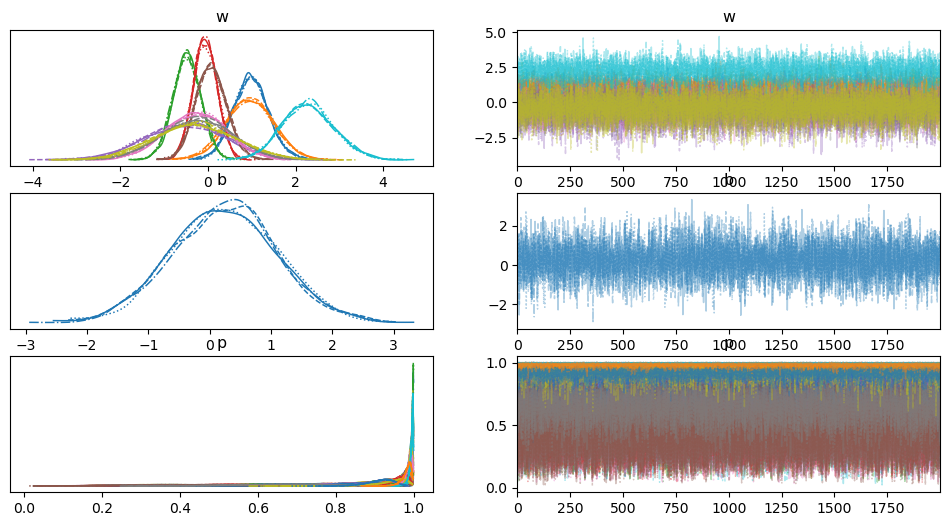

Mean: [ 0.98060069  0.95336425 -0.48013503 -0.06412034 -0.5182492   0.06786969
 -0.28725142 -0.26549008 -0.29830315  2.29256554]
Std: [0.41054007 0.54337969 0.32234597 0.27389266 0.92636738 0.35322614
 0.69461691 0.79728844 0.92548735 0.5897348 ]
TrainSet
Confusion Matrix:
 [[  4  16]
 [  2 150]]
AUC Score: 0.8914473684210527
Accuracy on X1: 0.8953488372093024
TestSet
Confusion Matrix:
 [[137 253]
 [  9 347]]
Accuracy on X2: 0.6487935656836461
AUC Score on X2: 0.8551426101987899
(746, 11) (746,)
Stage 2


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w_shared, w_cholesterol, b]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 44 seconds.


Confusion Matrix:
 [[334  56]
 [ 54 302]]
AUC Score: 0.9179487179487179
Accuracy on X2: 0.8525469168900804
Mean: [ 1.41039309  1.09151255 -0.68436775  0.38331434 -0.36710199 -0.52311108
  1.16718289 -0.57745377 -0.04912067  0.77496195  1.05487564]
Std: [0.18470415 0.21540655 0.11340916 0.11737008 0.69909492 0.18931328
 0.24154702 0.55642269 0.78772947 0.26970759 0.91388925]


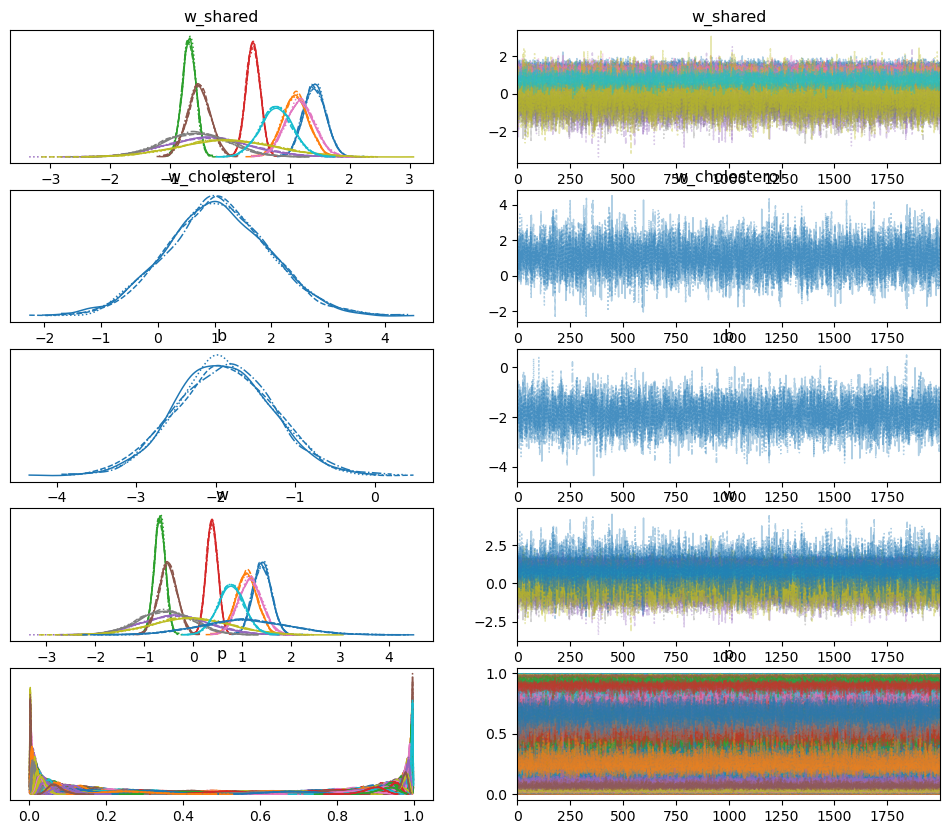

In [15]:
def train3(X1,y1,X2,y2):
    X1 = np.array(X1)
    y1 = np.array(y1).squeeze()
    print(X1.shape,y1.shape)
    # 一阶段
    print('Stage 1')
    with pm.Model() as logistic_model:
        w = pm.Normal("w", mu=0, sigma=1, shape=10)
        b = pm.Normal("b", mu=0, sigma=1)
        logit_p = pm.math.dot(X1, w) + b
        p = pm.Deterministic("p", 1/(1 + pm.math.exp(-logit_p)))
        y_obs = pm.Bernoulli("y_obs", p = p, observed = y1)
        trace1 = pm.sample(2000, tune = 1000, chains = 4, target_accept=0.9)
        
    az.plot_trace(trace1)
    plt.show()

    w1_mean = trace1.posterior["w"].mean(dim=("chain", "draw")).values
    w1_std = trace1.posterior["w"].std(dim=("chain", "draw")).values
    w1_samples = trace1.posterior["w"].stack(sample=("chain", "draw")).values
    b1_samples = trace1.posterior["b"].stack(sample=("chain", "draw")).values
    print(f'Mean: {w1_mean}\nStd: {w1_std}')
    p_mean = trace1.posterior["p"].mean(dim=("chain", "draw")).values
    y1_pred = (p_mean > 0.5).astype(int)
    
    # 训练集
    print('TrainSet')
    print("Confusion Matrix:\n", confusion_matrix(y1, y1_pred))
    print("AUC Score:", roc_auc_score(y1, p_mean))
    print("Accuracy on X1:", accuracy_score(y1, y1_pred))
    test_X = np.array(X2.drop('Cholesterol',axis = 1))
    test_y = np.array(y2).squeeze()
    
    n_samples = w1_samples.shape[1]
    n_test = test_X.shape[0]
    
    # 初始化预测数组
    logits = np.zeros((n_samples, n_test))
    for i in range(n_samples):
        logits[i] = test_X @ w1_samples[:, i] + b1_samples[i]
    probs = 1/(1+np.exp(-logits))
    prob_mean = probs.mean(axis=0)
    y2_pred = (prob_mean > 0.5).astype(int)
    
    # 测试集
    print('TestSet')
    print("Confusion Matrix:\n", confusion_matrix(test_y, y2_pred))
    print("Accuracy on X2:", accuracy_score(test_y, y2_pred))
    print("AUC Score on X2:", roc_auc_score(test_y, prob_mean))
    w1_posterior = trace1.posterior["w"]
    b1_posterior = trace1.posterior["b"]
    
    w1_mean = w1_posterior.mean(dim=("chain", "draw")).values
    w1_std = w1_posterior.std(dim=("chain", "draw")).values
    
    b1_mean = b1_posterior.mean(dim=("chain", "draw")).values.item()
    b1_std = b1_posterior.std(dim=("chain", "draw")).values.item()
    
    X2 = np.array(X2)
    y2 = np.array(y2).squeeze()
    print(X2.shape,y2.shape)
    # 二阶段
    print('Stage 2')
    with pm.Model() as model2:
        # 对前10个特征使用 informative prior（由第一个模型的后验提供）
        w_shared = pm.Normal("w_shared", mu=w1_mean, sigma=w1_std, shape=10)
        # 对新增特征 Cholesterol 使用非信息先验（可以调整为弱信息如 Normal(0, 5)）
        w_new = pm.Normal("w_cholesterol", mu=0, sigma=5)
        # 合并权重
        w = pm.Deterministic("w", pm.math.concatenate([w_shared, w_new[None]]))  # shape = (11,)
    
        b = pm.Normal("b", mu=b1_mean, sigma=b1_std)
    
        z = pm.math.dot(X2, w) + b
        p = pm.Deterministic("p", pm.math.sigmoid(z))
        y_obs = pm.Bernoulli("y_obs", p=p, observed=y2)
        trace2 = pm.sample(2000, tune=1000, target_accept=0.9, return_inferencedata=True)
    az.plot_trace(trace2)

    p2_mean = trace2.posterior["p"].mean(dim=("chain", "draw")).values
    y2_pred = (p2_mean > 0.5).astype(int)
    
    print("Confusion Matrix:\n", confusion_matrix(y2, y2_pred))
    print("AUC Score:", roc_auc_score(y2, p2_mean))
    print("Accuracy on X2:", accuracy_score(y2, y2_pred))

    w2_mean = trace2.posterior["w"].mean(dim=("chain", "draw")).values
    w2_std = trace2.posterior["w"].std(dim=("chain", "draw")).values
    w2_samples = trace2.posterior["w"].stack(sample=("chain", "draw")).values
    b2_samples = trace2.posterior["b"].stack(sample=("chain", "draw")).values
    print(f'Mean: {w2_mean}\nStd: {w2_std}')
train3(X1,y1,X2,y2)

(172, 10) (172,)
Stage 1


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_w, w, b]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 35 seconds.


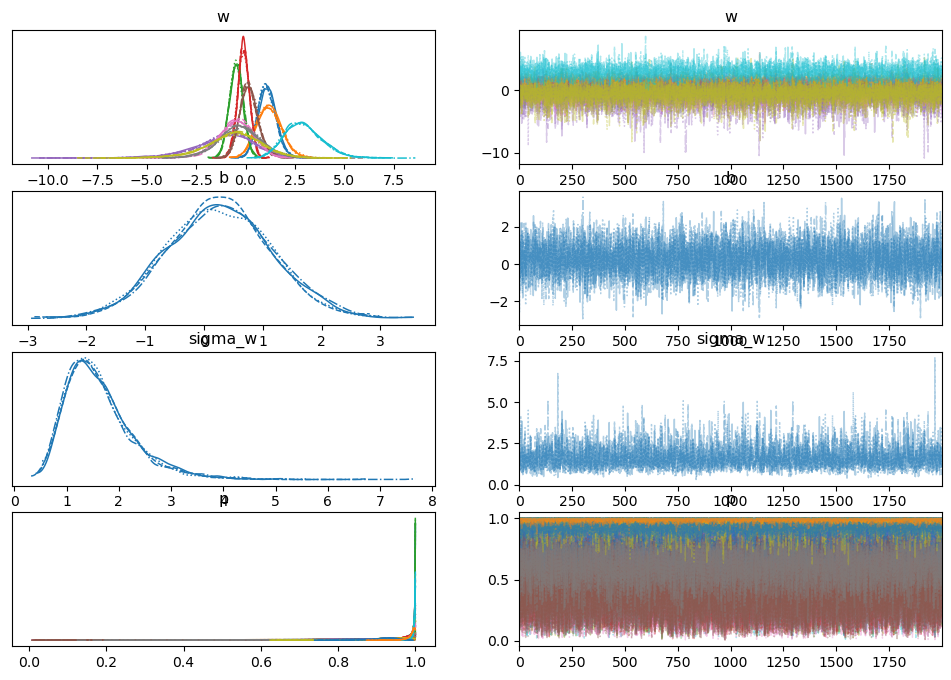

Mean: [ 1.08487408  1.19348839 -0.46977532 -0.10489654 -1.08087994  0.18099249
 -0.50751699 -0.28536773 -0.60394794  2.95032967]
Std: [0.45846066 0.64070336 0.3498594  0.30304388 1.59570466 0.47469291
 0.90926335 1.10005708 1.46676763 0.96834366]
TrainSet
Confusion Matrix:
 [[  6  14]
 [  3 149]]
AUC Score: 0.8970394736842107
Accuracy on X1: 0.9011627906976745
TestSet
Confusion Matrix:
 [[170 220]
 [ 15 341]]
Accuracy on X2: 0.6849865951742627
AUC Score on X2: 0.8415658311725729
(746, 11) (746,)
Stage 2


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w_shared, w_cholesterol, b]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 51 seconds.


Confusion Matrix:
 [[335  55]
 [ 56 300]]
AUC Score: 0.9187481993661769
Accuracy on X2: 0.8512064343163539
Mean: [ 1.47146917  1.11608633 -0.67968425  0.37360521 -0.18241025 -0.63407759
  1.26094275 -0.81615302  0.24204688  0.60232638  1.12794058]
Std: [0.19385329 0.2228748  0.11254158 0.11757788 0.99270267 0.24203207
 0.25172993 0.67635846 1.07670258 0.28299228 0.91383816]


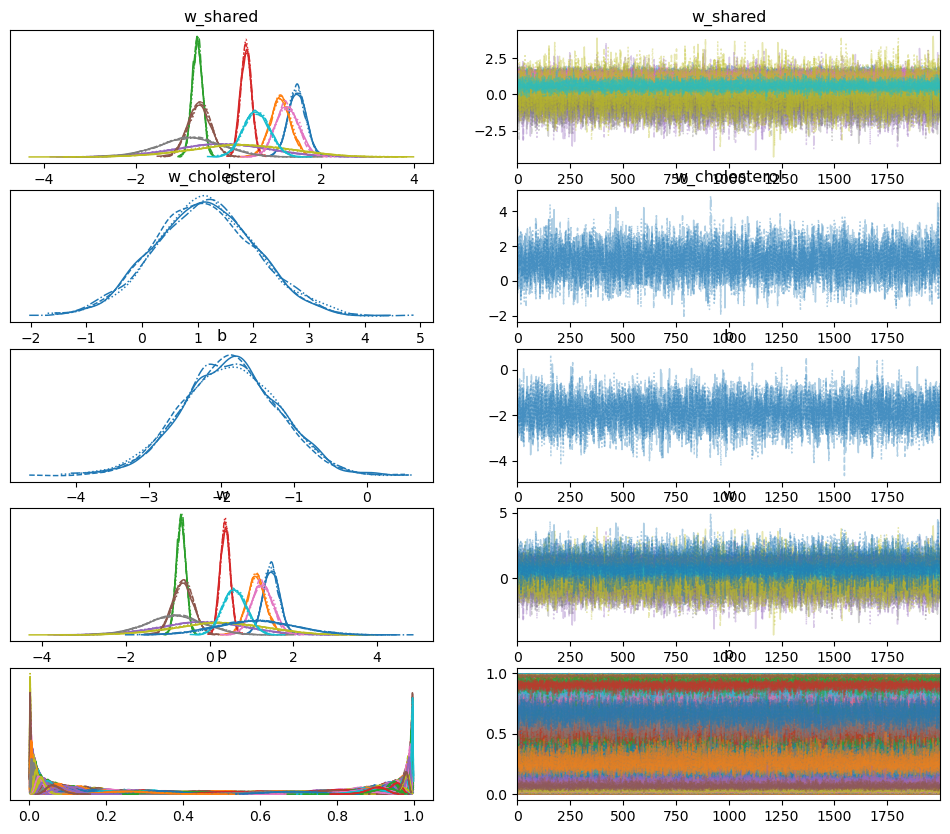

In [16]:
def train4(X1,y1,X2,y2):
    X1 = np.array(X1)
    y1 = np.array(y1).squeeze()
    print(X1.shape,y1.shape)
    # 一阶段
    print('Stage 1')
    with pm.Model() as logistic_model:
        sigma_w = pm.HalfNormal("sigma_w", sigma=5)
        w = pm.Normal("w", mu=0, sigma=sigma_w, shape=10)
        b = pm.Normal("b", mu=0, sigma=1)
        logit_p = pm.math.dot(X1, w) + b
        p = pm.Deterministic("p", 1/(1 + pm.math.exp(-logit_p)))
        y_obs = pm.Bernoulli("y_obs", p = p, observed = y1)
        trace1 = pm.sample(2000, tune = 1000, chains = 4, target_accept=0.9)
        
    az.plot_trace(trace1)
    plt.show()

    w1_mean = trace1.posterior["w"].mean(dim=("chain", "draw")).values
    w1_std = trace1.posterior["w"].std(dim=("chain", "draw")).values
    w1_samples = trace1.posterior["w"].stack(sample=("chain", "draw")).values
    b1_samples = trace1.posterior["b"].stack(sample=("chain", "draw")).values
    print(f'Mean: {w1_mean}\nStd: {w1_std}')
    p_mean = trace1.posterior["p"].mean(dim=("chain", "draw")).values
    y1_pred = (p_mean > 0.5).astype(int)
    
    # 训练集
    print('TrainSet')
    print("Confusion Matrix:\n", confusion_matrix(y1, y1_pred))
    print("AUC Score:", roc_auc_score(y1, p_mean))
    print("Accuracy on X1:", accuracy_score(y1, y1_pred))
    test_X = np.array(X2.drop('Cholesterol',axis = 1))
    test_y = np.array(y2).squeeze()
    
    n_samples = w1_samples.shape[1]
    n_test = test_X.shape[0]
    
    # 初始化预测数组
    logits = np.zeros((n_samples, n_test))
    for i in range(n_samples):
        logits[i] = test_X @ w1_samples[:, i] + b1_samples[i]
    probs = 1/(1+np.exp(-logits))
    prob_mean = probs.mean(axis=0)
    y2_pred = (prob_mean > 0.5).astype(int)
    
    # 测试集
    print('TestSet')
    print("Confusion Matrix:\n", confusion_matrix(test_y, y2_pred))
    print("Accuracy on X2:", accuracy_score(test_y, y2_pred))
    print("AUC Score on X2:", roc_auc_score(test_y, prob_mean))
    w1_posterior = trace1.posterior["w"]
    b1_posterior = trace1.posterior["b"]
    
    w1_mean = w1_posterior.mean(dim=("chain", "draw")).values
    w1_std = w1_posterior.std(dim=("chain", "draw")).values
    
    b1_mean = b1_posterior.mean(dim=("chain", "draw")).values.item()
    b1_std = b1_posterior.std(dim=("chain", "draw")).values.item()
    
    X2 = np.array(X2)
    y2 = np.array(y2).squeeze()
    print(X2.shape,y2.shape)
    # 二阶段
    print('Stage 2')
    with pm.Model() as model2:
        # 对前10个特征使用 informative prior（由第一个模型的后验提供）
        w_shared = pm.Normal("w_shared", mu=w1_mean, sigma=w1_std, shape=10)
        # 对新增特征 Cholesterol 使用非信息先验（可以调整为弱信息如 Normal(0, 5)）
        w_new = pm.Normal("w_cholesterol", mu=0, sigma=5)
        # 合并权重
        w = pm.Deterministic("w", pm.math.concatenate([w_shared, w_new[None]]))  # shape = (11,)
    
        b = pm.Normal("b", mu=b1_mean, sigma=b1_std)
    
        z = pm.math.dot(X2, w) + b
        p = pm.Deterministic("p", pm.math.sigmoid(z))
        y_obs = pm.Bernoulli("y_obs", p=p, observed=y2)
        trace2 = pm.sample(2000, tune=1000, target_accept=0.9, return_inferencedata=True)
        
    az.plot_trace(trace2)

    p2_mean = trace2.posterior["p"].mean(dim=("chain", "draw")).values
    y2_pred = (p2_mean > 0.5).astype(int)
    
    print("Confusion Matrix:\n", confusion_matrix(y2, y2_pred))
    print("AUC Score:", roc_auc_score(y2, p2_mean))
    print("Accuracy on X2:", accuracy_score(y2, y2_pred))

    w2_mean = trace2.posterior["w"].mean(dim=("chain", "draw")).values
    w2_std = trace2.posterior["w"].std(dim=("chain", "draw")).values
    w2_samples = trace2.posterior["w"].stack(sample=("chain", "draw")).values
    b2_samples = trace2.posterior["b"].stack(sample=("chain", "draw")).values
    print(f'Mean: {w2_mean}\nStd: {w2_std}')
train4(X1,y1,X2,y2)

In [17]:
X1 = np.array(X1)
y1 = np.array(y1).squeeze()
X2 = np.array(X2)
y2 = np.array(y2).squeeze()

# 层次贝叶斯

In [18]:
X1_padded = np.hstack([X1, np.zeros((X1.shape[0], 1))])  # 补零 Cholesterol 列
X_all = np.vstack([X1_padded, X2])  # shape: (N_total, 11)
y_all = np.concatenate([y1, y2])

group = np.concatenate([np.zeros(X1.shape[0]), np.ones(X2.shape[0])]).astype(int)

with pm.Model() as hierarchical_logistic:
    # 全局先验：所有特征共享一个正态中心
    mu_w = pm.Normal("mu_w", mu=0, sigma=2, shape=11)
    sigma_w = pm.HalfNormal("sigma_w", sigma=2.5, shape=11)

    # 每组数据都有自己的特征权重
    w_group = pm.Normal("w_group", mu=mu_w, sigma=sigma_w, shape=(2, 11))  # 2组

    # 偏置项也层次建模
    mu_b = pm.Normal("mu_b", 0, 1)
    sigma_b = pm.HalfNormal("sigma_b", 1)
    b_group = pm.Normal("b_group", mu=mu_b, sigma=sigma_b, shape=2)

    w = w_group[group]     # shape: (N_total, 11)
    b = b_group[group]     # shape: (N_total,)

    logit_p = (X_all * w).sum(axis=1) + b
    p = pm.Deterministic("p", pm.math.sigmoid(logit_p))

    # 输出为 HeartDisease 发生概率
    y_obs = pm.Bernoulli("y_obs", p=p, observed=y_all)

    trace_all = pm.sample(2000, tune=1000, target_accept=0.95)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_w, sigma_w, w_group, mu_b, sigma_b, b_group]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 327 seconds.
There were 592 divergences after tuning. Increase `target_accept` or reparameterize.


In [ ]:
with hierarchical_logistic:
    ppc = pm.sample_posterior_predictive(trace_all)

az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=hierarchical_logistic))

Confusion Matrix:
 [[342  68]
 [ 54 454]]
AUC Score: 0.9293019012867295
Accuracy on X1: 0.8671023965141612


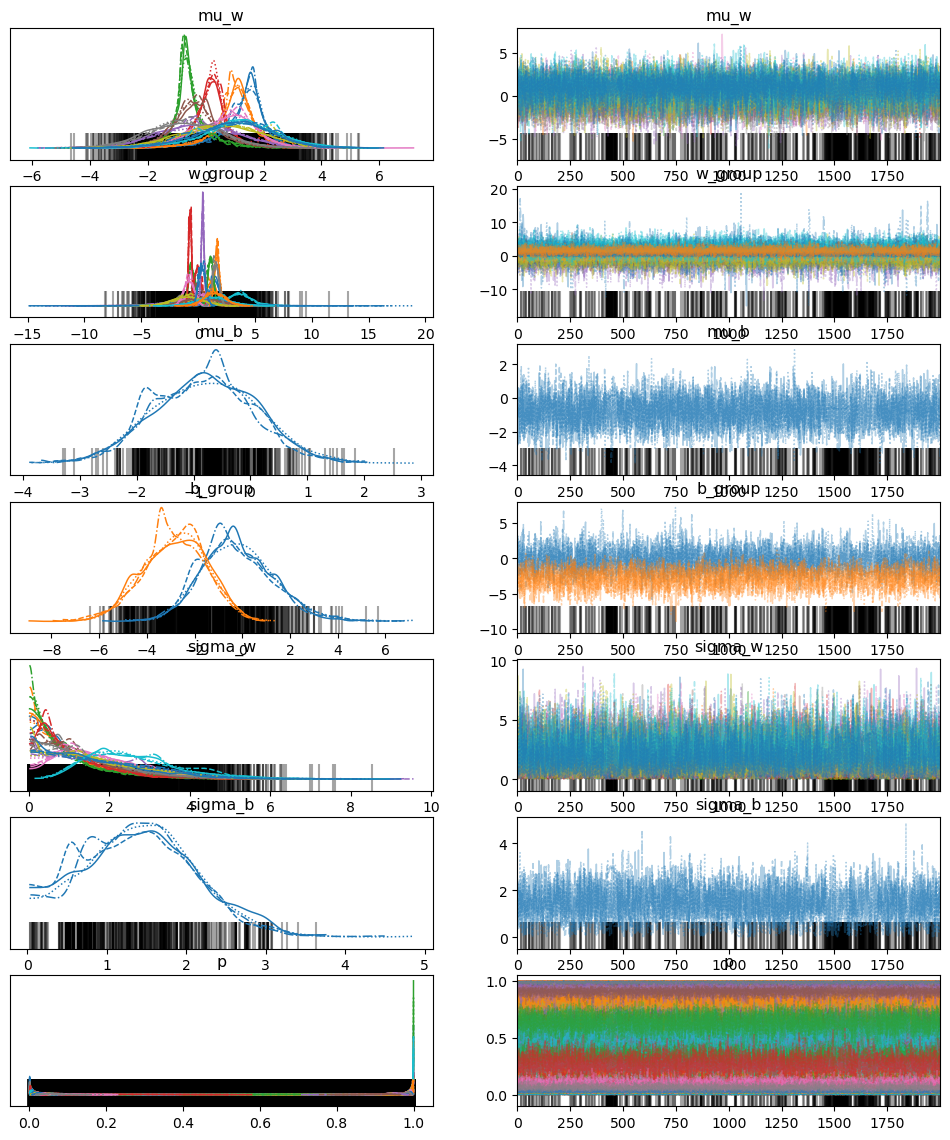

In [19]:
az.plot_trace(trace_all)

p_mean = trace_all.posterior["p"].mean(dim=("chain", "draw")).values
y_all_pred = (p_mean > 0.5).astype(int)

# 训练集
print("Confusion Matrix:\n", confusion_matrix(y_all, y_all_pred))
print("AUC Score:", roc_auc_score(y_all, p_mean))
print("Accuracy on X1:", accuracy_score(y_all, y_all_pred))

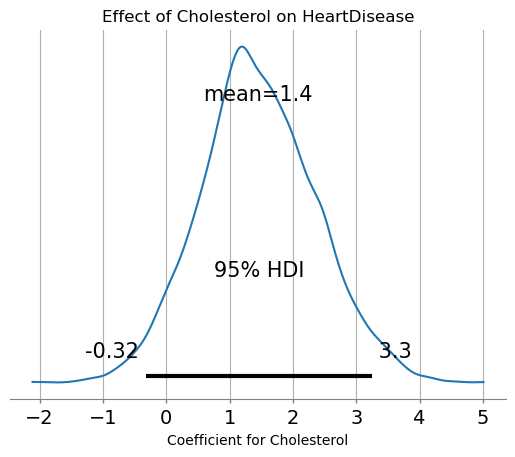

In [69]:
# 查看 Cholesterol 系数在不同组的后验分布（最后一列索引为 10）
w_group_samples = trace_all.posterior["w_group"]  # shape: (chain, draw, 2, 11)

cholesterol_group1 = w_group_samples[:, :, 1, 10].values.flatten()  # 第二组（X2）中的 Cholesterol 系数

az.plot_posterior(cholesterol_group1, hdi_prob=0.95)
plt.title("Effect of Cholesterol on HeartDisease")
plt.xlabel("Coefficient for Cholesterol")
plt.grid()
plt.show()

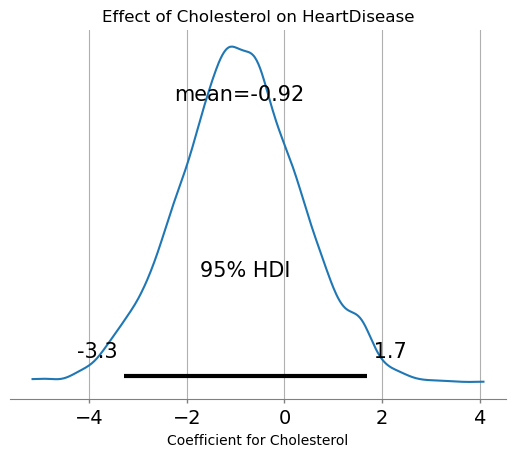

In [64]:
w_group_samples = trace_all.posterior["w_group"]  # shape: (chain, draw, 2, 11)

cholesterol_group1 = w_group_samples[:, :, 1, 7].values.flatten()  # 第二组（X2）中的 Cholesterol 系数

az.plot_posterior(cholesterol_group1, hdi_prob=0.95)
plt.title("Effect of Cholesterol on HeartDisease")
plt.xlabel("Coefficient for Cholesterol")
plt.grid()
plt.show()

In [21]:
def Predict_Probability(new_patient):
    w2 = trace_all.posterior["w_group"][:, :, 1, :].stack(sample=("chain", "draw")).values  # (11, N)
    b2 = trace_all.posterior["b_group"][:, :, 1].stack(sample=("chain", "draw")).values     # (N,)
    
    logits = new_patient @ w2 + b2  # shape: (1, N)
    prob = 1 / (1 + np.exp(-logits))
    predicted_prob = prob.mean()
    print("Predicted HeartDisease probability:", predicted_prob)
    return predicted_prob
print(f'Input Feature List: [{','.join(Col[1:].values)}]')
P = Predict_Probability(X2[0])

Input Feature List: [ST_Slope,ExerciseAngina,ChestPainType,Oldpeak,MaxHR,HR_Age_Ratio,Sex,Age,RPP,FastingBS,Cholesterol]
Predicted HeartDisease probability: 0.04989262417833977


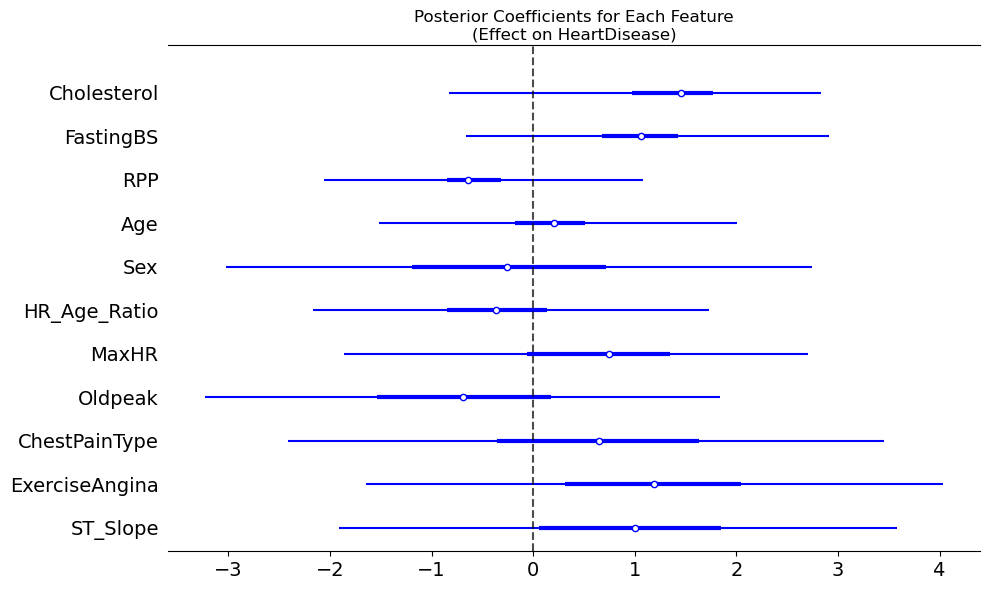

In [65]:
feature_names = ['ST_Slope', 'ExerciseAngina', 'ChestPainType','Oldpeak', 'MaxHR', 'HR_Age_Ratio', 'Sex', 'Age', 'RPP', 'FastingBS', 'Cholesterol']

mu_w = trace_all.posterior["mu_w"]
mu_w_values = mu_w.stack(sample=("chain", "draw")).values.T  # shape: (11, samples)

fig, ax = plt.subplots(figsize=(10, 6))
az.plot_forest(mu_w, 
               var_names=["mu_w"], 
               combined=True, 
               hdi_prob=0.95,
               kind='forestplot',
               ridgeplot_overlap=2,
               ridgeplot_alpha=0.5,
               figsize=(8, 6),
               colors="blue",
               ax=ax)
ax.set_yticklabels(feature_names)
ax.set_title("Posterior Coefficients for Each Feature\n(Effect on HeartDisease)")
ax.axvline(0, color="black", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [34]:
print(Col[1:])

Index(['ST_Slope', 'ExerciseAngina', 'ChestPainType', 'Oldpeak', 'MaxHR',
       'HR_Age_Ratio', 'Sex', 'Age', 'RPP', 'FastingBS', 'Cholesterol'],
      dtype='object')


C:\Users\Fan\AppData\Local\Temp\ipykernel_1328\402165030.py:26: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  p_hdi = az.hdi(p_samples, hdi_prob=0.50)


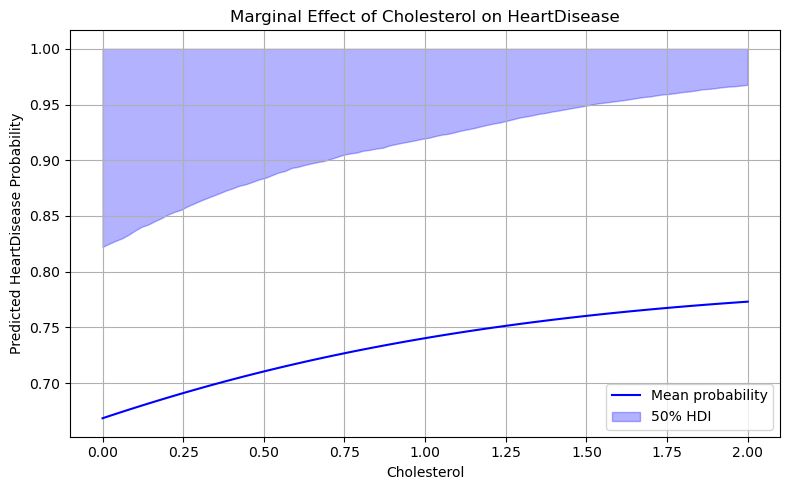

In [24]:
# 等间距取样
chol_values = np.linspace(0, 2, 100)

# 构造一个“中等值”输入样本（其余变量取中位数）
X_median = np.median(X_all, axis=0)

# 用 Cholesterol 替换最后一列，其它保持中位数
X_input = np.tile(X_median, (100, 1))
X_input[:, -1] = chol_values  # Cholesterol

# 获取 mu_w 和 mu_b 后验样本
mu_w_samples = mu_w.stack(sample=("chain", "draw")).values.T  # (n_samples, 11)
mu_b_samples = trace_all.posterior["mu_b"].stack(sample=("chain", "draw")).values.flatten()  # (n_samples,)

# 每个样本算出100个 Cholesterol 对应的预测概率（sigmoid）
p_samples = []
for w, b in zip(mu_w_samples, mu_b_samples):
    logit = X_input @ w + b
    p = 1 / (1 + np.exp(-logit))
    p_samples.append(p)

p_samples = np.array(p_samples)  # shape: (n_samples, 100)

# 计算平均值和置信区间
p_mean = p_samples.mean(axis=0)
p_hdi = az.hdi(p_samples, hdi_prob=0.50)

# 绘图
plt.figure(figsize=(8, 5))
plt.plot(chol_values, p_mean, label='Mean probability', color='blue')
plt.fill_between(chol_values, p_hdi[:, 0], p_hdi[:, 1], color='blue', alpha=0.3, label='50% HDI')
plt.xlabel("Cholesterol")
plt.ylabel("Predicted HeartDisease Probability")
plt.title("Marginal Effect of Cholesterol on HeartDisease")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Fan\AppData\Local\Temp\ipykernel_1328\303910471.py:23: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  p_hdi = az.hdi(p_samples, hdi_prob=0.50)


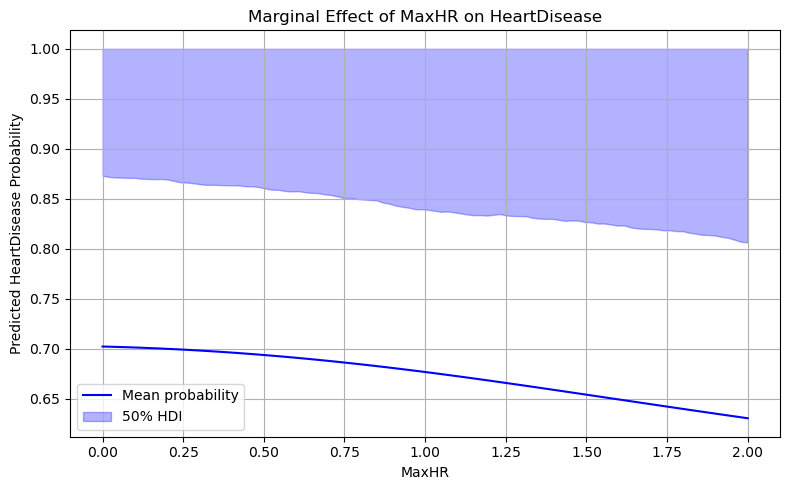

In [43]:
# 等间距取样
chol_values = np.linspace(0, 2, 100)

X_median = np.median(X_all, axis=0)

X_input = np.tile(X_median, (100, 1))
X_input[:, 4] = chol_values  # MaxHR

# 获取 mu_w 和 mu_b 后验样本
mu_w_samples = mu_w.stack(sample=("chain", "draw")).values.T  # (n_samples, 11)
mu_b_samples = trace_all.posterior["mu_b"].stack(sample=("chain", "draw")).values.flatten()  # (n_samples,)

p_samples = []
for w, b in zip(mu_w_samples, mu_b_samples):
    logit = X_input @ w + b
    p = 1 / (1 + np.exp(-logit))
    p_samples.append(p)

p_samples = np.array(p_samples)  # shape: (n_samples, 100)

# 计算平均值和置信区间
p_mean = p_samples.mean(axis=0)
p_hdi = az.hdi(p_samples, hdi_prob=0.50)

# 绘图
plt.figure(figsize=(8, 5))
plt.plot(chol_values, p_mean, label='Mean probability', color='blue')
plt.fill_between(chol_values, p_hdi[:, 0], p_hdi[:, 1], color='blue', alpha=0.3, label='50% HDI')
plt.xlabel("MaxHR")
plt.ylabel("Predicted HeartDisease Probability")
plt.title("Marginal Effect of MaxHR on HeartDisease")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Fan\AppData\Local\Temp\ipykernel_1328\600298591.py:23: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  p_hdi = az.hdi(p_samples, hdi_prob=0.50)


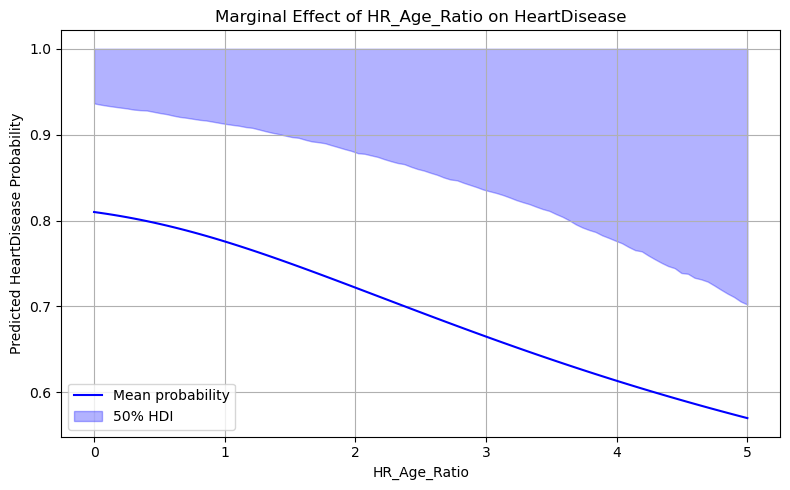

In [70]:
# 等间距取样
chol_values = np.linspace(0, 5, 100)

X_median = np.median(X_all, axis=0)

X_input = np.tile(X_median, (100, 1))
X_input[:, 5] = chol_values  # HR_Age_Ratio

# 获取 mu_w 和 mu_b 后验样本
mu_w_samples = mu_w.stack(sample=("chain", "draw")).values.T  # (n_samples, 11)
mu_b_samples = trace_all.posterior["mu_b"].stack(sample=("chain", "draw")).values.flatten()  # (n_samples,)

p_samples = []
for w, b in zip(mu_w_samples, mu_b_samples):
    logit = X_input @ w + b
    p = 1 / (1 + np.exp(-logit))
    p_samples.append(p)

p_samples = np.array(p_samples)  # shape: (n_samples, 100)

# 计算平均值和置信区间
p_mean = p_samples.mean(axis=0)
p_hdi = az.hdi(p_samples, hdi_prob=0.50)

# 绘图
plt.figure(figsize=(8, 5))
plt.plot(chol_values, p_mean, label='Mean probability', color='blue')
plt.fill_between(chol_values, p_hdi[:, 0], p_hdi[:, 1], color='blue', alpha=0.3, label='50% HDI')
plt.xlabel("HR_Age_Ratio")
plt.ylabel("Predicted HeartDisease Probability")
plt.title("Marginal Effect of HR_Age_Ratio on HeartDisease")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Fan\AppData\Local\Temp\ipykernel_1328\3136280266.py:23: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  p_hdi = az.hdi(p_samples, hdi_prob=0.50)


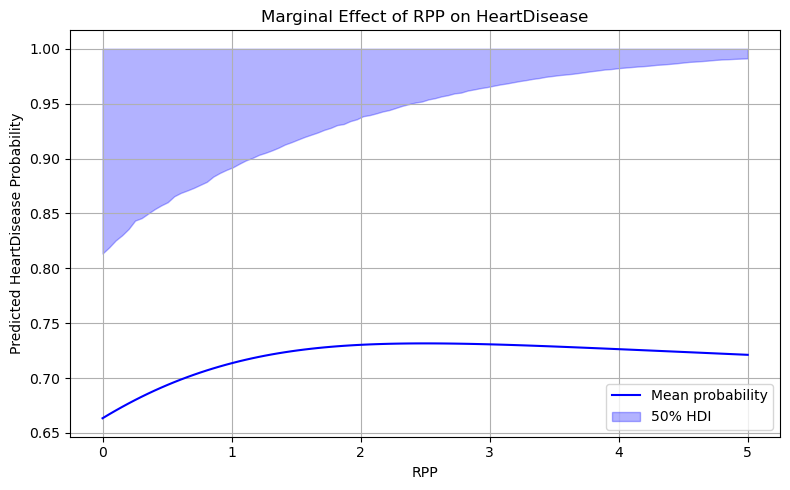

In [44]:
# 等间距取样
chol_values = np.linspace(0, 5, 100)

X_median = np.median(X_all, axis=0)

X_input = np.tile(X_median, (100, 1))
X_input[:, 8] = chol_values  # RPP

# 获取 mu_w 和 mu_b 后验样本
mu_w_samples = mu_w.stack(sample=("chain", "draw")).values.T  # (n_samples, 11)
mu_b_samples = trace_all.posterior["mu_b"].stack(sample=("chain", "draw")).values.flatten()  # (n_samples,)

p_samples = []
for w, b in zip(mu_w_samples, mu_b_samples):
    logit = X_input @ w + b
    p = 1 / (1 + np.exp(-logit))
    p_samples.append(p)

p_samples = np.array(p_samples)  # shape: (n_samples, 100)

# 计算平均值和置信区间
p_mean = p_samples.mean(axis=0)
p_hdi = az.hdi(p_samples, hdi_prob=0.50)

# 绘图
plt.figure(figsize=(8, 5))
plt.plot(chol_values, p_mean, label='Mean probability', color='blue')
plt.fill_between(chol_values, p_hdi[:, 0], p_hdi[:, 1], color='blue', alpha=0.3, label='50% HDI')
plt.xlabel("RPP")
plt.ylabel("Predicted HeartDisease Probability")
plt.title("Marginal Effect of RPP on HeartDisease")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()